# Loan Portfolio Risk & Performance Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Import

In [42]:
df = pd.read_csv("D:\\Me\\Data Analytics\\Finance Project _ Bank Analysis\\financial_loan.csv")
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### Data Cleaning

In [43]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df['last_payment_date'].fillna('No Payment', inplace=True)
df['last_credit_pull_date'].fillna('Not Pulled', inplace=True)

In [46]:
# Convert date columns to datetime with dayfirst=True
df['issue_date'] = pd.to_datetime(df['issue_date'], dayfirst=True)
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], dayfirst=True)
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], dayfirst=True)

# Check the data types to confirm the conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

## Exploratory Data Analysis

### Loan Distribution by States

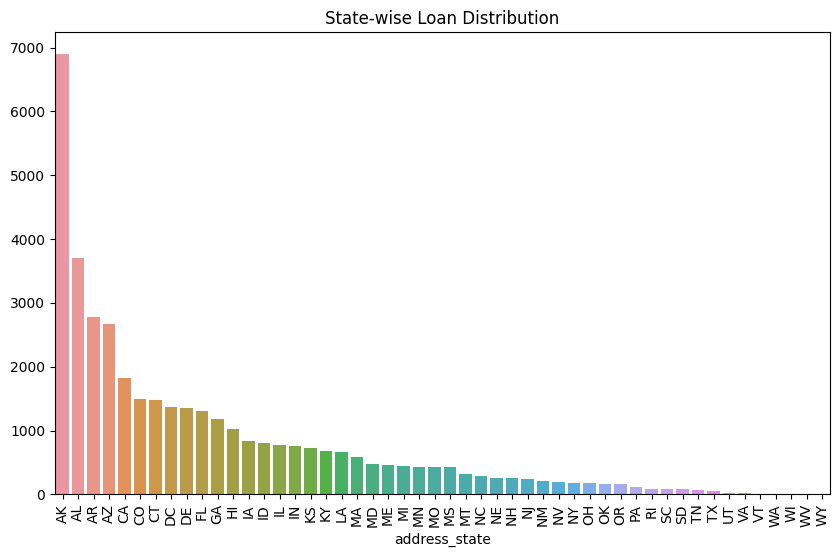

In [65]:
state_wise_loans = df.groupby('address_state')['loan_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='address_state', y=loan_by_state.values, data=state_wise_loans)
plt.title('State-wise Loan Distribution')
plt.xticks(rotation=90)
plt.show()

### Loan Amount Distribution

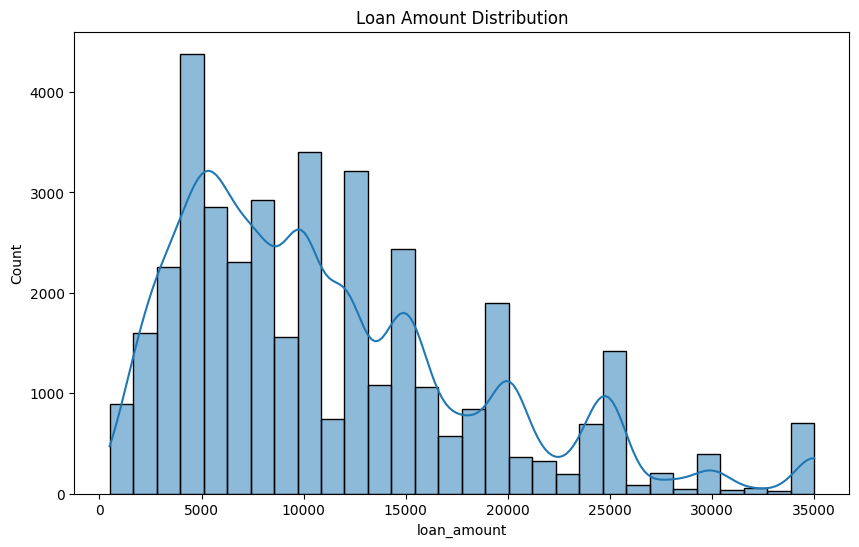

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

### Income vs Loan Amount

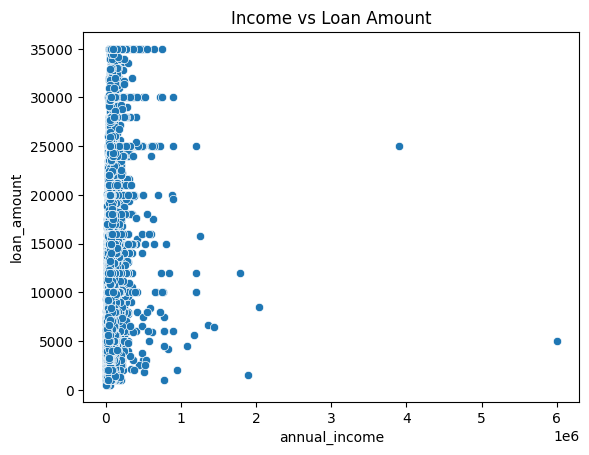

In [49]:
sns.scatterplot(x='annual_income', y='loan_amount', data=df)
plt.title('Income vs Loan Amount')
plt.show()

### Loan Portfolio Performance

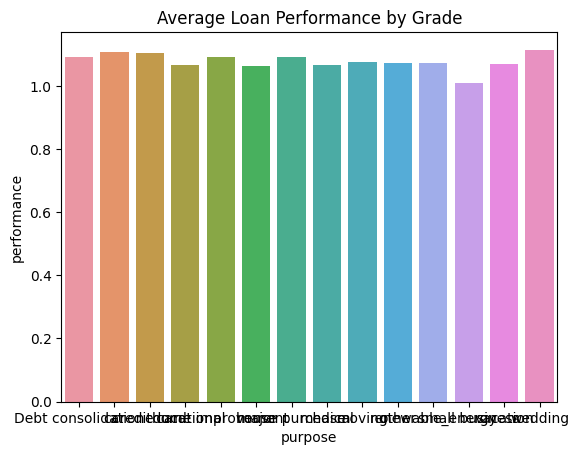

In [99]:
df['performance'] = df['total_payment'] / df['loan_amount']
df_performance = df.groupby('purpose')['performance'].mean().reset_index()
sns.barplot(x='purpose', y='performance', data=df_performance)
plt.title('Average Loan Performance by Grade')
plt.show()

### Risk Indicators:

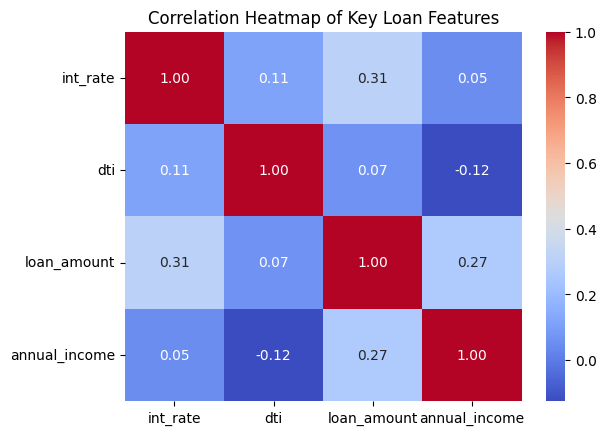

In [108]:
corr = df[['int_rate', 'dti', 'loan_amount', 'annual_income']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Loan Features')
plt.show()


### Employment Length Impact on Loan Amount

c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


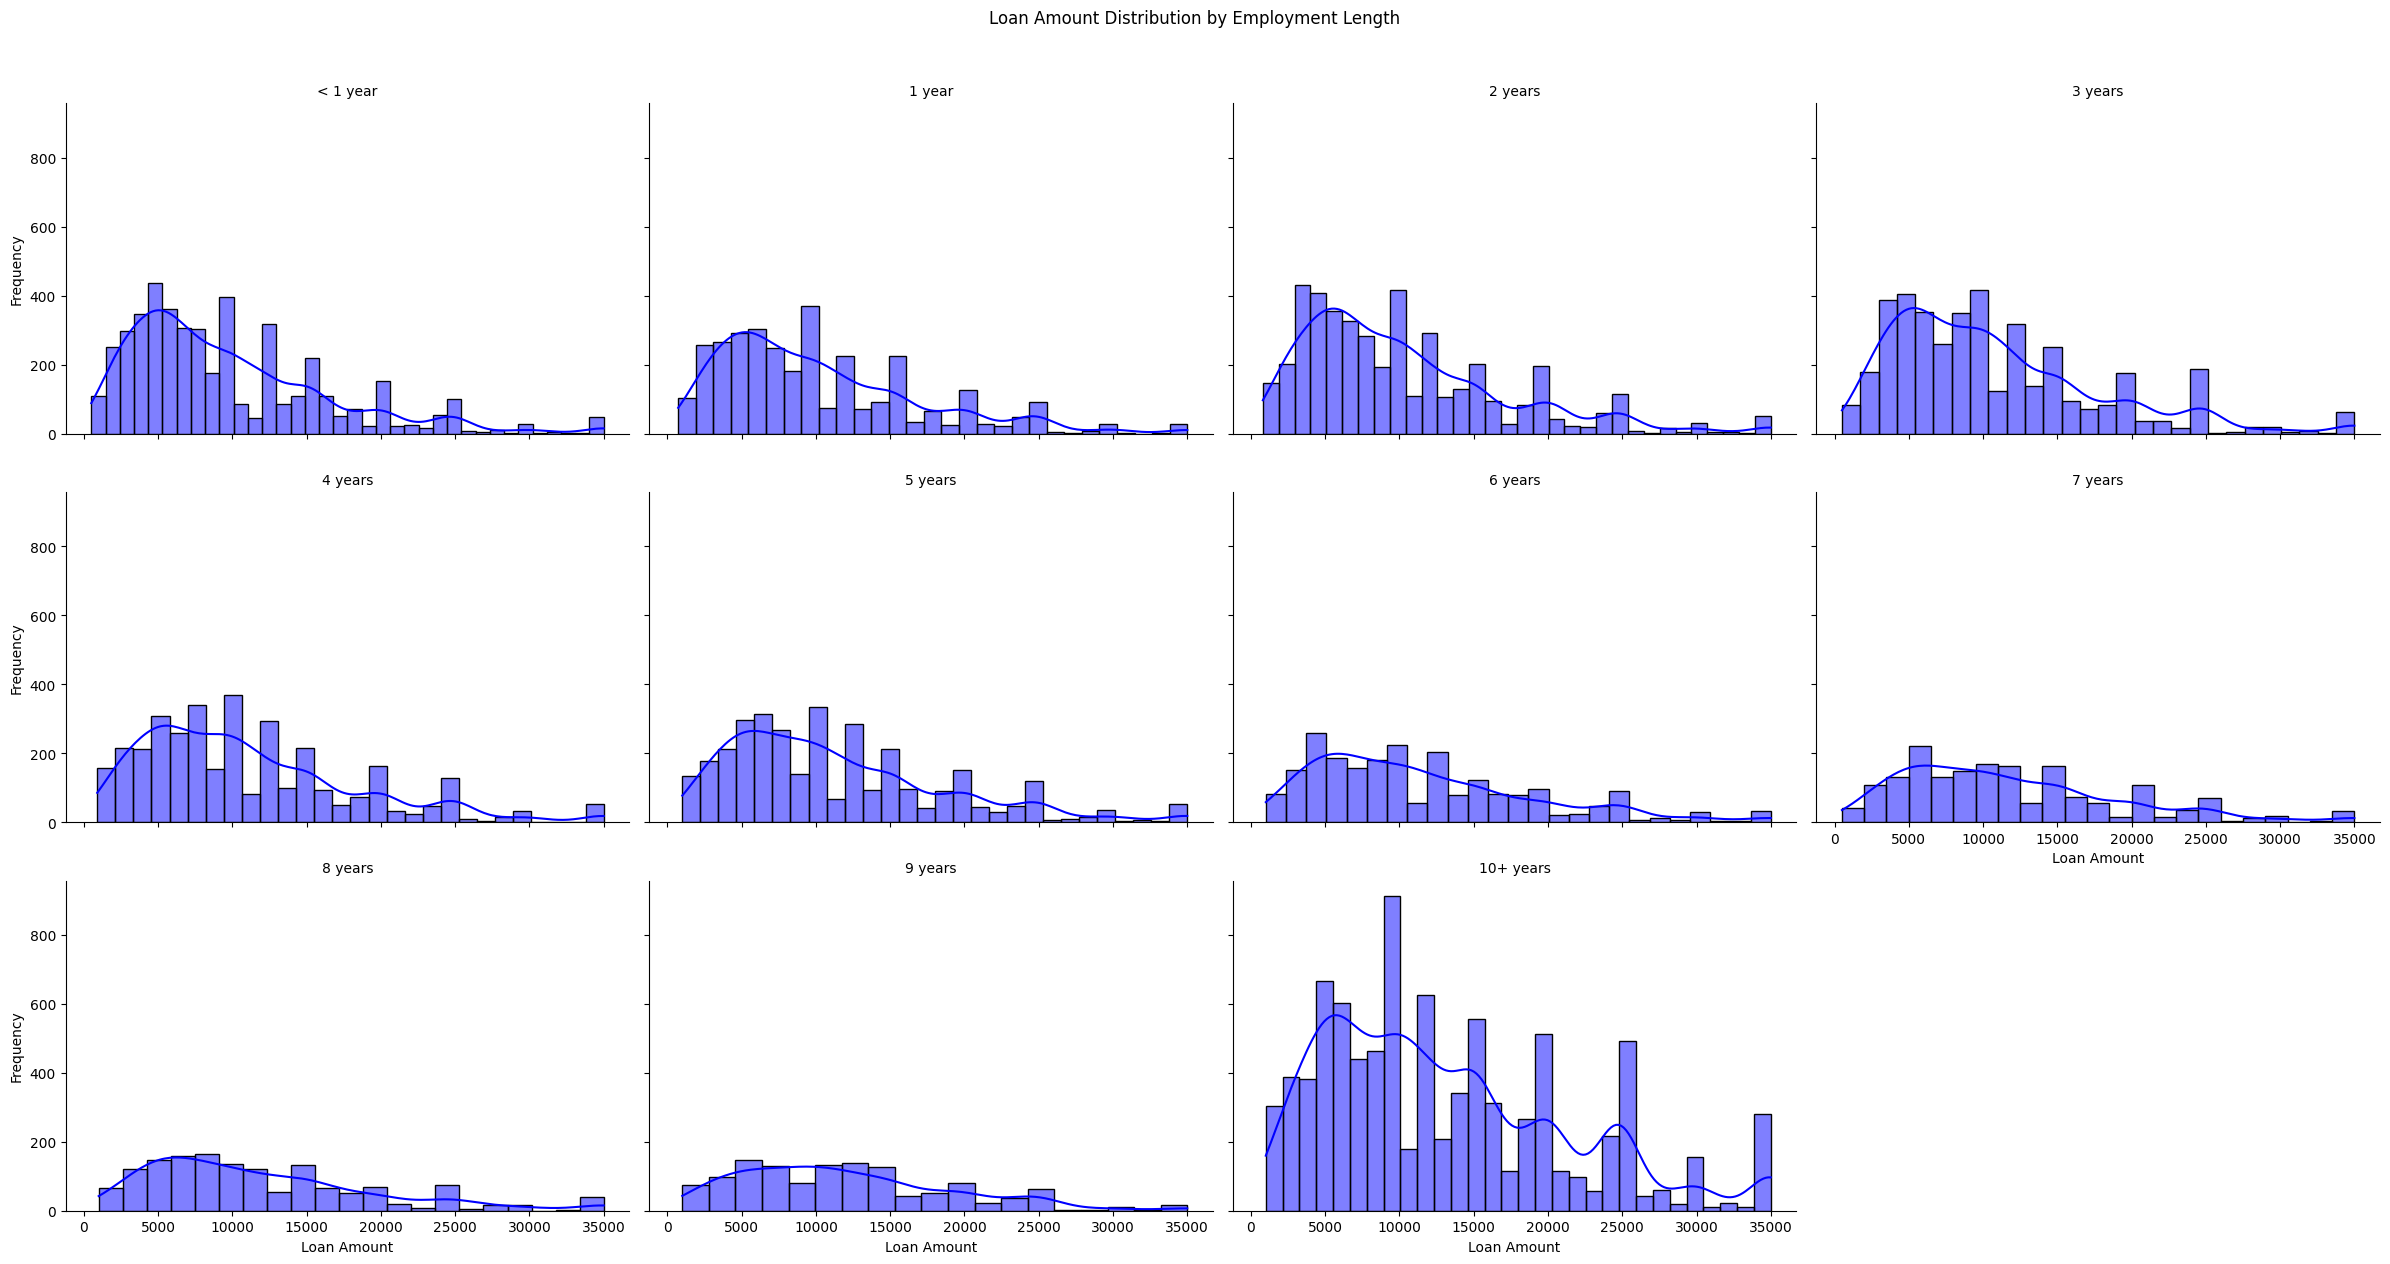

In [98]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                    '6 years', '7 years', '8 years', '9 years', '10+ years']

df['emp_length'] = pd.Categorical(df['emp_length'], categories=emp_length_order, ordered=True)

g = sns.FacetGrid(df, col='emp_length', col_wrap=4, height=4, aspect=1.5)
g.map(sns.histplot, 'loan_amount', kde=True, color='blue')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Loan Amount', 'Frequency')
g.fig.suptitle('Loan Amount Distribution by Employment Length', y=1.05)
plt.show()


### Loan Terms vs Performance

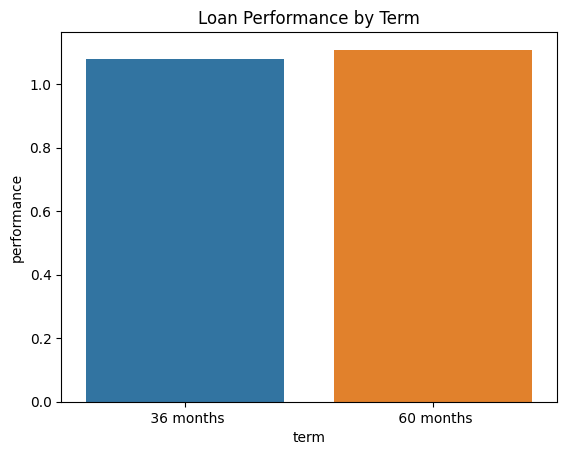

In [53]:
df_term_perf = df.groupby('term')['performance'].mean().reset_index()
sns.barplot(x='term', y='performance', data=df_term_perf)
plt.title('Loan Performance by Term')
plt.show()

### Feature Engineering

In [55]:
# Calculate loan duration
df['loan_duration'] = (df['last_payment_date'] - df['issue_date']).dt.days

# Monthly payment calculations (based on term and installment)
df['total_expected_payment'] = df['installment'] * (df['term'].apply(lambda x: int(x.split()[0])))  # Assuming 36 or 60 months

# Optional: Categorize DTI
df['dti_category'] = pd.cut(df['dti'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Low', 'Moderate', 'High', 'Very High', 'Critical'])

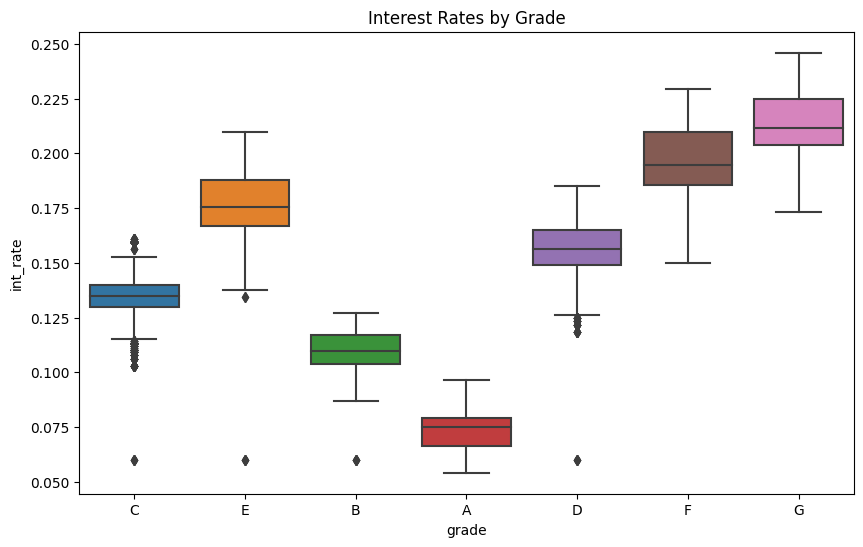

In [57]:
# Interest Rates vs. Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=df)
plt.title('Interest Rates by Grade')
plt.show()

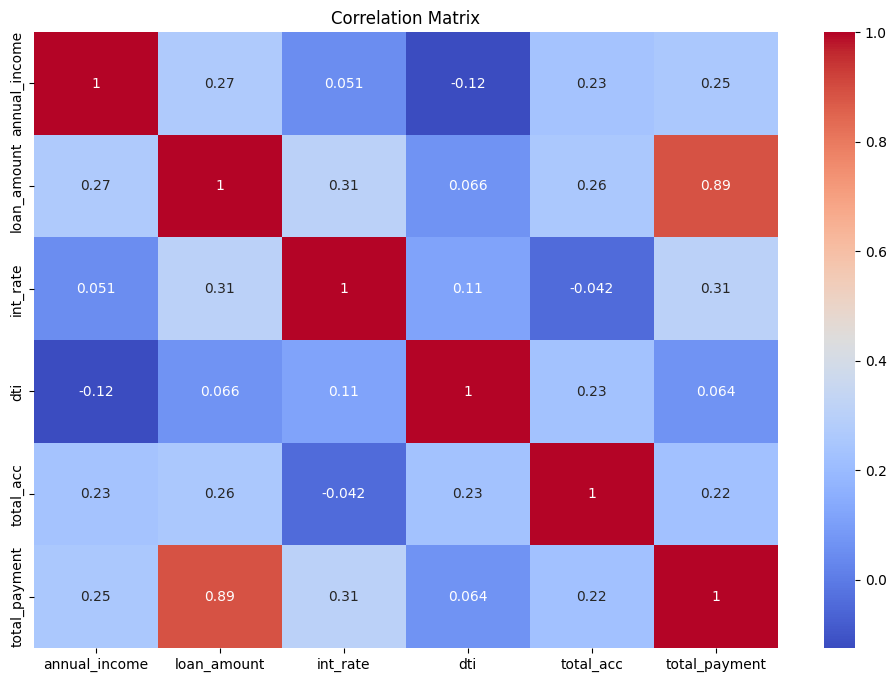

In [59]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[['annual_income', 'loan_amount', 'int_rate', 'dti', 'total_acc', 'total_payment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

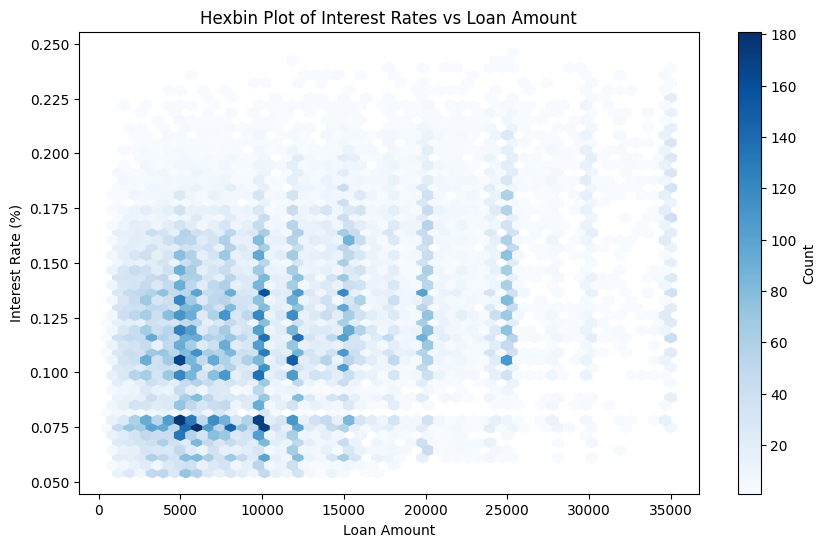

In [90]:
# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['loan_amount'], df['int_rate'], gridsize=50, cmap='Blues', mincnt=1)
plt.title('Hexbin Plot of Interest Rates vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.colorbar(label='Count')
plt.show()


In [69]:
# Classifying loans based on DTI and grade
df['loan_risk'] = np.where((df['dti'] > 0.4) & (df['grade'].isin(['D', 'E', 'F', 'G'])), 'bad', 'good')

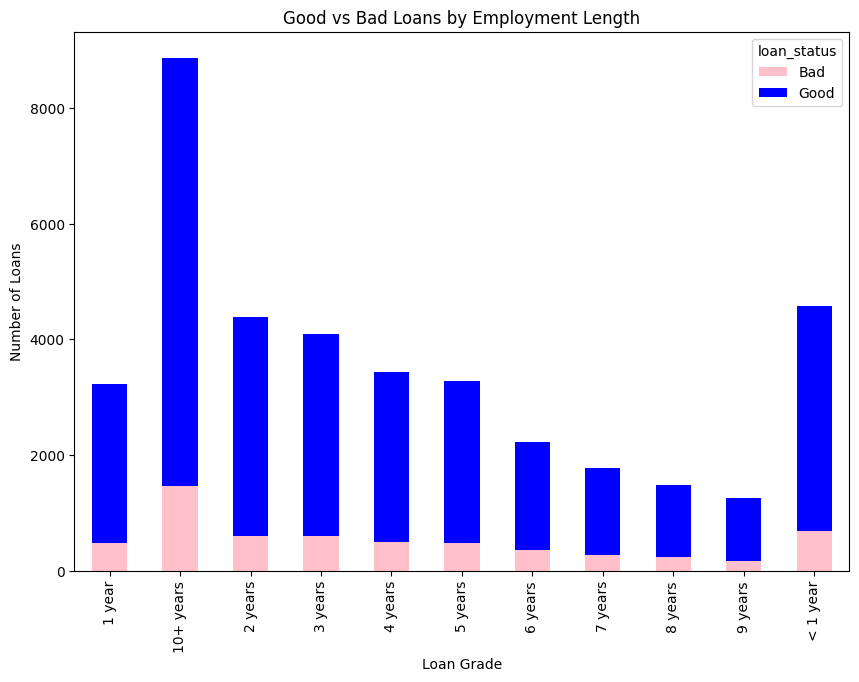

In [85]:
# # Analyze borrowing trends based on employment length
# emp_length_analysis = df.groupby(['emp_length', 'loan_risk'])['loan_amount'].sum().unstack()
# emp_length_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
# plt.title('Good vs Bad Loans by Employment Length')
# plt.ylabel('Total Loan Amount')
# plt.show()

# Group by grade and loan status
emp_length_analysis = df.groupby(['emp_length', 'loan_status'])['loan_amount'].size().unstack()

# Plotting loan status by employee_length
emp_length_analysis.plot(kind='bar', stacked=True, figsize=(10,7), color=['pink', 'blue'])
plt.title('Good vs Bad Loans by Employment Length')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.show()


In [72]:
# Create a new column to classify loans as Good or Bad
df['loan_status'] = df.apply(lambda x: 'Good' if x['total_payment'] > x['loan_amount'] else 'Bad', axis=1)

# Check the distribution of Good and Bad loans
loan_status_counts = df['loan_status'].value_counts()
print(loan_status_counts)


loan_status
Good    32715
Bad      5861
Name: count, dtype: int64


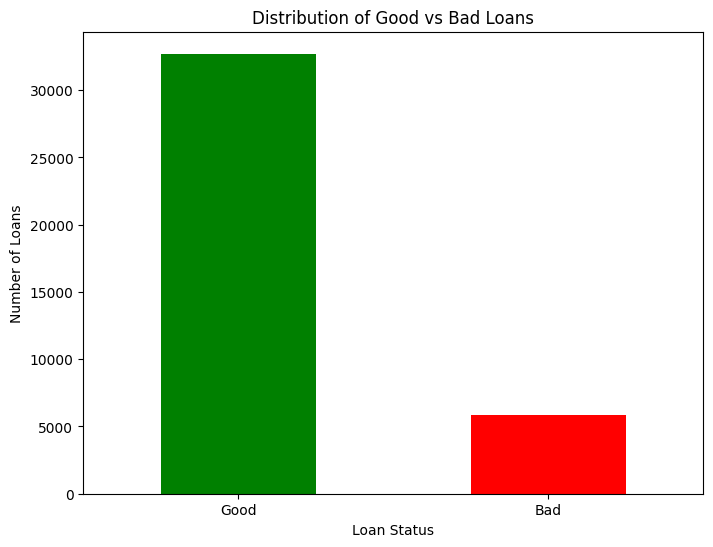

In [73]:
# Plot the distribution of Good vs Bad loans
plt.figure(figsize=(8,6))
loan_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Good vs Bad Loans')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.show()


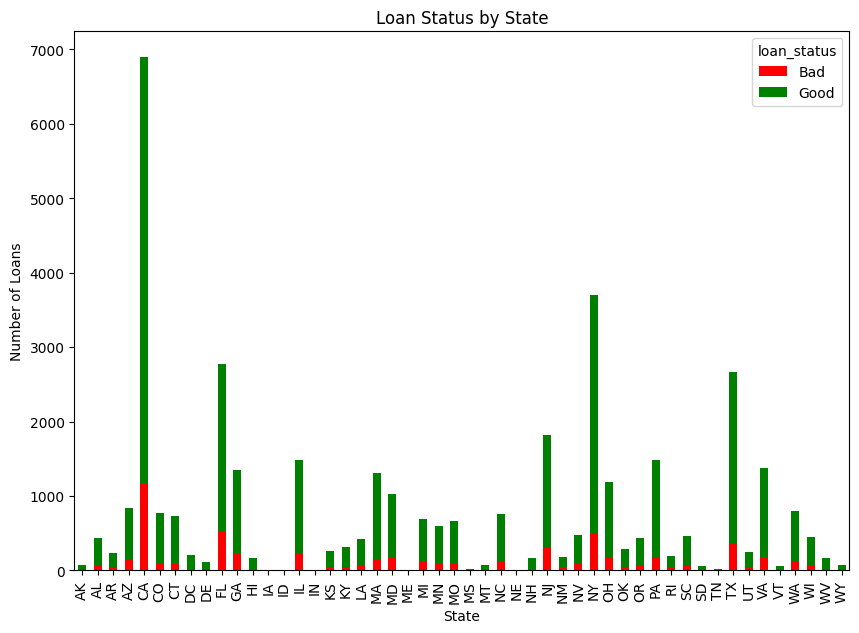

In [81]:
# Group by grade and loan status
loan_grade_status = df.groupby(['address_state', 'loan_status']).size().unstack()

# Plotting loan status by grade
loan_grade_status.plot(kind='bar', stacked=True, figsize=(10,7), color=['red', 'green'])
plt.title('Loan Status by State')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.show()
